#### This was created as a demonstration code for the question on Stack Overflow
The original link the for question: 
https://stackoverflow.com/questions/71350817/python-large-dataframe-calculate-standard-deviation-of-expanding-returns

# Import libraries

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate date range
the dates are consitent with the date range specified in the post

In [41]:
d_range = pd.date_range(start='01/06/1986', end='12/31/2020', freq='D')
d_range

DatetimeIndex(['1986-01-06', '1986-01-07', '1986-01-08', '1986-01-09',
               '1986-01-10', '1986-01-11', '1986-01-12', '1986-01-13',
               '1986-01-14', '1986-01-15',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=12779, freq='D')

In [42]:
type(d_range)

pandas.core.indexes.datetimes.DatetimeIndex

# Generate random stock price 

In [43]:
price = np.random.randint(10000,93436,size=(len(d_range)))
price

array([48788, 33359, 39572, ..., 16631, 10961, 44451])

# Generte Non Time Series DataFrame

In [170]:
df = pd.DataFrame(price, columns=['PERMNO'])
df['date'] = d_range
print(df.head(3))
print(df.tail(3))

   PERMNO
0   48788
1   33359
2   39572
       PERMNO
12776   16631
12777   10961
12778   44451


# Calculate simple daily returns

In [172]:
df['RETX'] = df['PERMNO'] / df['PERMNO'].shift(1) - 1
print(df.head(3))
print(df.tail(3))

   PERMNO       date      RETX
0   48788 1986-01-06       NaN
1   33359 1986-01-07 -0.316246
2   39572 1986-01-08  0.186247
       PERMNO       date      RETX
12776   16631 2020-12-29 -0.759337
12777   10961 2020-12-30 -0.340930
12778   44451 2020-12-31  3.055378


# Convert to Time Series DataFrame

In [173]:
df = df.set_index(df['date'])
df.drop('date', axis=1, inplace=True)
print(df.head(3))
print(df.tail(3))

            PERMNO       date      RETX
date                                   
1986-01-06   48788 1986-01-06       NaN
1986-01-07   33359 1986-01-07 -0.316246
1986-01-08   39572 1986-01-08  0.186247
            PERMNO       date      RETX
date                                   
2020-12-29   16631 2020-12-29 -0.759337
2020-12-30   10961 2020-12-30 -0.340930
2020-12-31   44451 2020-12-31  3.055378


In [49]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Calculate standard deviation of daily returns

## Jan 2020

In [175]:
std_1 = df['01/01/2020':'01/31/2020']['RETX'].std()
print("The std for Jan is: {}".format(round(std_1,3)))

The std for Jan is: 1.341


## Jan - Feb 2020

In [176]:
std_2 = df['01/01/2020':'02/29/2020']['RETX'].std()
print("The std for Jan - Feb is: {}".format(round(std_2,3)))

The std for Jan - Feb is: 1.202


## ...
# Jan - Dec 2020

In [177]:
std_12 = df['01/01/2020':'12/31/2020']['RETX'].std()
print("The std for Jan - Dec is: {}".format(round(std_12,3)))

The std for Jan - Dec is: 1.382


# Play around with groupby() 
A tutorial on groupby()
https://www.youtube.com/watch?v=qy0fDqoMJx8

In [231]:
# Create three new DataFrames with extra column 'ticker'
df1 = df['01/01/2020':'12/31/2020'].copy()
df1.rename(columns={'PERMNO':'price', 'RETX':'return'}, inplace=True)
df1['ticker'] = 'ticker1'
df1 = df1[['ticker', 'price', 'return']]
print(df1.head(3))
print(df1.tail(3))

             ticker  price    return
date                                
2020-01-01  ticker1  81663  0.104584
2020-01-02  ticker1  34259 -0.580483
2020-01-03  ticker1  46575  0.359497
             ticker  price    return
date                                
2020-12-29  ticker1  16631 -0.759337
2020-12-30  ticker1  10961 -0.340930
2020-12-31  ticker1  44451  3.055378


In [234]:
df2 = df1.copy()
df3 = df1.copy()
df2['ticker'] = 'ticker2'
df3['ticker'] = 'ticker3'
p2 = np.random.randint(10000,35000,size=(len(df1)))
p3 = np.random.randint(10000,50000,size=(len(df1)))
df2.price = p2
df3.price = p3
df2['return'] = df2['price'] / df2['price'].shift(1) - 1
df3['return'] = df3['price'] / df3['price'].shift(1) - 1
print(df2.head(3))
print(df3.head(3))

             ticker  price    return
date                                
2020-01-01  ticker2  19909       NaN
2020-01-02  ticker2  21924  0.101211
2020-01-03  ticker2  10755 -0.509442
             ticker  price    return
date                                
2020-01-01  ticker3  15985       NaN
2020-01-02  ticker3  19753  0.235721
2020-01-03  ticker3  29157  0.476080


In [236]:
# Join three df together to immitate the data in the post
df_tickers = pd.concat([df1, df2, df3])
df_tickers

,ticker,price,return
date,,,
2020-01-01,ticker1,81663,0.104584
2020-01-02,ticker1,34259,-0.580483
2020-01-03,ticker1,46575,0.359497
2020-01-04,ticker1,87814,0.885432
2020-01-05,ticker1,42853,-0.512003
...,...,...,...
2020-12-27,ticker3,44120,1.405540
2020-12-28,ticker3,19625,-0.555190
2020-12-29,ticker3,35277,0.797554


In [237]:
df_tickers.groupby('ticker').std()

,price,return
ticker,,
ticker1,25176.808779,1.381824
ticker2,7196.767883,0.585509
ticker3,11418.751754,0.774863


In [238]:
df_tickers.groupby('ticker').agg(['count','min','max','mean','std','var'])

price                                                         return  \
        count    min    max          mean           std           var  count   
ticker                                                                         
ticker1   366  10157  92947  50046.027322  25176.808779  6.338717e+08    366   
ticker2   366  10001  34874  22528.207650   7196.767883  5.179347e+07    365   
ticker3   366  10073  49961  29311.510929  11418.751754  1.303879e+08    365   

                                                           
              min       max      mean       std       var  
ticker                                                     
ticker1 -0.879002  6.861544  0.447233  1.381824  1.909437  
ticker2 -0.687843  2.429068  0.127869  0.585509  0.342820  
ticker3 -0.791458  3.470925  0.207575  0.774863  0.600413

<AxesSubplot:xlabel='ticker'>

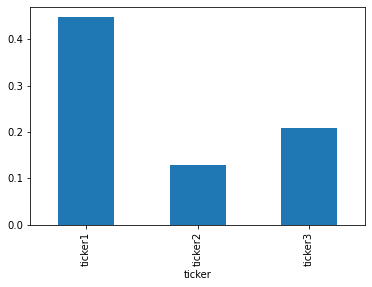

In [239]:
df_tickers.groupby('ticker')['return'].mean().plot(kind='bar')

<AxesSubplot:xlabel='ticker'>

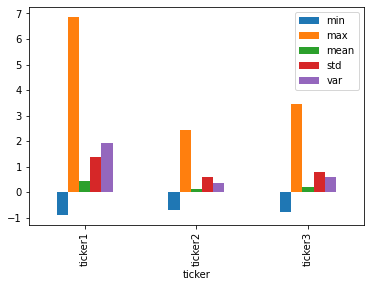

In [240]:
df_tickers.groupby('ticker')['return'].agg(['min','max','mean','std','var']).plot(kind='bar')

# Play around with append()
An answer explains differences between append() and concat()
https://stackoverflow.com/questions/15819050/pandas-dataframe-concat-vs-append/48168086#48168086

"One more thing you have to keep in mind that the APPEND() method in Pandas doesn't modify the original object. Instead it creates a new one with combined data. Because of involving creation and data buffer, its performance is not well. You'd better use CONCAT() function when doing multi-APPEND operations."

In [246]:
dfs = df1.append(df2)
dfs

,ticker,price,return
date,,,
2020-01-01,ticker1,81663,0.104584
2020-01-02,ticker1,34259,-0.580483
2020-01-03,ticker1,46575,0.359497
2020-01-04,ticker1,87814,0.885432
2020-01-05,ticker1,42853,-0.512003
...,...,...,...
2020-12-27,ticker2,11712,-0.360699
2020-12-28,ticker2,24608,1.101093
2020-12-29,ticker2,33130,0.346310


In [248]:
dfs = dfs.append(df3)
dfs

,ticker,price,return
date,,,
2020-01-01,ticker1,81663,0.104584
2020-01-02,ticker1,34259,-0.580483
2020-01-03,ticker1,46575,0.359497
2020-01-04,ticker1,87814,0.885432
2020-01-05,ticker1,42853,-0.512003
...,...,...,...
2020-12-27,ticker3,44120,1.405540
2020-12-28,ticker3,19625,-0.555190
2020-12-29,ticker3,35277,0.797554
